<a href="https://colab.research.google.com/github/Divyanshu-ISM/Time-Series-Forecasting-/blob/main/TimeSeries1_ACF_and_PACF_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#1. Basic Analysis & Getting Familiar

In [8]:
df_icecream = pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv',
                          index_col=0, parse_dates=True)

df_icecream = df_icecream.rename(columns={'IPN31152N':'production'})

In [9]:
df_icecream.columns

Index(['production'], dtype='object')

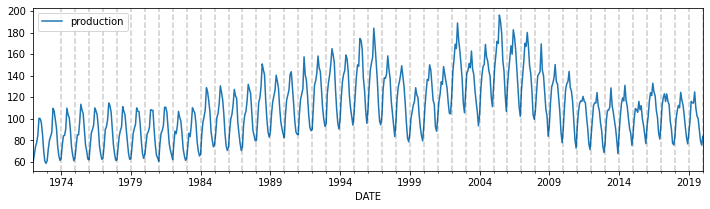

In [13]:
df_icecream.plot(figsize=(12,3))
for year in range(1974,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [11]:
df_icecream.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=577, freq=None)

In [14]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_icecream = df_icecream[start_date:]

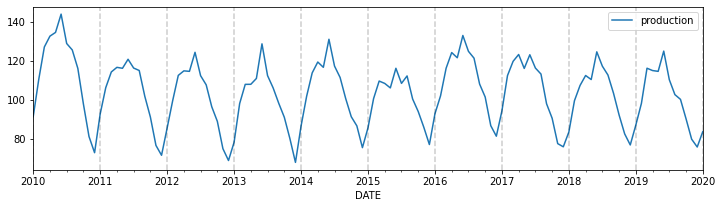

In [15]:
df_icecream.plot(figsize=(12,3))
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### Note :- If we just take the above data (subset) for analysis and forecasting : It is Stationary and the model can be good.

## ACF using StatsModels Library

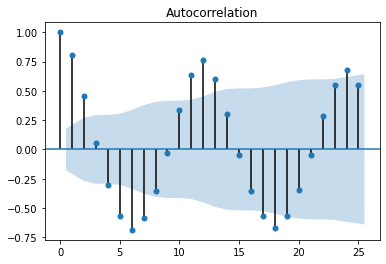

In [130]:
acf_plot = plot_acf(df_icecream.production, lags=25)

### Trying to create the ACF plot from scratch

In [30]:
np.corrcoef(df_icecream['production'], df_icecream['production'].shift(1).fillna(method='bfill'))[0,1]

0.8095817947315487

## ACF : Internal Logic (From Scratch)

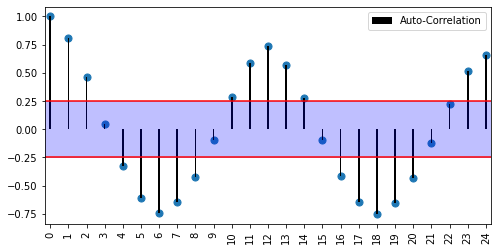

In [151]:
corrs = {}

for l in range(25):
  T_o = df_icecream['production']
  T_l = df_icecream['production'].shift(l).fillna(method='bfill')

  c = np.corrcoef(T_o, T_l)[0,1]

  corrs[l] = [c]

df_acf = pd.DataFrame(corrs).T
df_acf.rename(columns={0:'Auto-Correlation'}, inplace=True)


df_acf.plot(kind='bar', figsize=(8,4), width=0.092, color='k', label='Auto-Correlation')
plt.scatter(df_acf.index, df_acf.values, s=50)

plt.axhspan(-0.25, 0.25, color='blue', alpha=0.25)
plt.axhline(0.25, color='red')
plt.axhline(-0.25, color='red')


plt.legend();

In [62]:
df_acf

,0
0,1.000000
1,0.809582
2,0.467147
3,0.047572
4,-0.329692
5,-0.604965
6,-0.741015
7,-0.649031
8,-0.420357
9,-0.092911


In [82]:
T = df_icecream['production']

T1 = T.shift(1).fillna(method='bfill')
T2 = T.shift(2).fillna(method='bfill')
T3 = T.shift(3).fillna(method='bfill')
T4 = T.shift(4).fillna(method='bfill')

c_01 = np.corrcoef(T, T.shift(1).fillna(method='bfill'))[0,1]

c_02 = np.corrcoef(T, T.shift(2).fillna(method='bfill'))[0,1]

c_12 = np.corrcoef(T.shift(1).fillna(method='bfill'), T.shift(2).fillna(method='bfill'))[0,1]

c_01, c_02, c_12

(0.8095817947315487, 0.46714710304446755, 0.8080862027787009)

In [68]:
c_02_p = c_02 - c_12

c_02_p

-0.34093909973423336

In [69]:
# y = 2x1 + 3x2 + 5
# y = 1*y1 + 0.3*f(y1) + 5

In [86]:
df_012 = pd.DataFrame({'T':T, 'T1':T1, 'T2':T2, 'T3':T3, 'T4':T4})

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(df_012[['T1']], df_012['T'])

lm.coef_

array([0.81252034])

## PACF : Internal Logic (From Scratch)

In [111]:
def finding_pacf(T, lag=2):

  df_temp = {'T':T}

  for l in range(1,lag+1):
    T_lag = T.shift(l).fillna(method='bfill')
    df_temp['T'+ str(l)] = T_lag
    
  df_temp = pd.DataFrame(df_temp)


  lags_reqd = [f'T{l}' for l in range(1,lag+1)]
  from sklearn.linear_model import LinearRegression

  lm = LinearRegression()

  _  = lm.fit(df_temp[lags_reqd], df_temp['T'])

  PACF = {l : lm.coef_[-1]}

  return PACF[l]



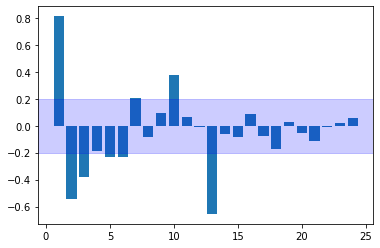

In [128]:
my_lags = np.arange(1,25,dtype=int)
T = df_icecream['production']
my_pacfs = [finding_pacf(T,l) for l in my_lags]

plt.bar(my_lags, my_pacfs)
plt.axhspan(-0.20, +0.20, color='blue', alpha=0.2)

#### Based on decaying ACF, we are likely dealing with an Auto Regressive process

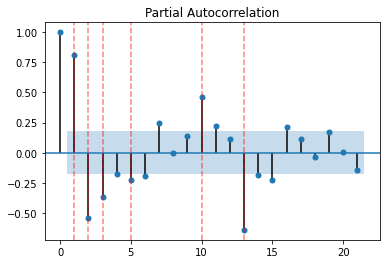

In [152]:
pacf_plot = plot_pacf(df_icecream.production)

for p in [1,2,3,5,10, 13]:
  plt.axvline(p, color='red', ls='--', alpha=0.5)


# #To verify my calculations with statsmodels results
# for h in np.arange(1,20, dtype=int):
#   plt.axhline(finding_pacf(T,h), color='k', ls='--', alpha=0.225)

#### Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13